# EMAIL SPAM DETECTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('./spam.csv')
df.columns = ['catagory', 'message']
df.shape

(5572, 2)

In [4]:
df.catagory.value_counts()

# imbalanced dataset

catagory
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df['catagory'] = df['catagory'].apply(lambda x: 1 if x=='spam' else 0)

In [6]:
df

,catagory,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:


X_train, X_test, y_train, y_test = train_test_split(df.message, df.catagory, test_size=0.3)
v = CountVectorizer()
X_train_cv = v.fit_transform(X_train)

In [8]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)


MultinomialNB()

In [9]:
X_test_cv = v.transform(X_test)

In [10]:
y_pred = model.predict(X_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1443
           1       0.95      0.91      0.93       229

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## Using sklearn pipeline

In [11]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [12]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1443
           1       0.95      0.91      0.93       229

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



<Axes: ylabel='Metric'>

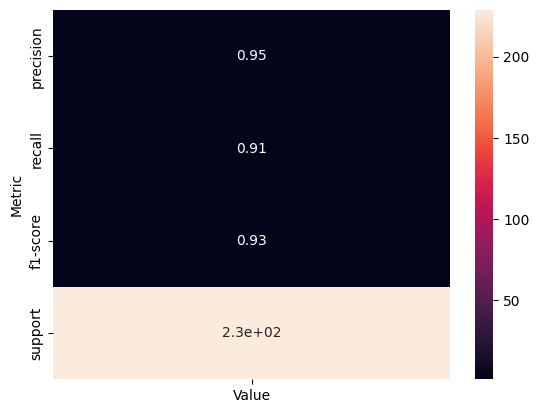

In [13]:
y_pred = clf.predict(X_test)
cfm = classification_report(y_test, y_pred)
print(cfm)


cfm_report = classification_report(y_test, y_pred, output_dict=True)
cfm_data = cfm_report['1'] 
cfm_df = pd.DataFrame.from_dict(cfm_data, orient='index', columns=['Value'])
cfm_df.index.name = 'Metric'
sns.heatmap(cfm_df, annot=True)

In [14]:
joblib.dump(clf, './naive_bayes.pkl')

['./naive_bayes.pkl']